<a href="https://colab.research.google.com/github/eddielin0926/kaggle/blob/main/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)
Start here! Predict survival on the Titanic and get familiar with ML basics  


## Preparation

In [371]:
! pip install --upgrade pip
! pip install --upgrade kaggle
! pip install --upgrade flaml

Set environment variable for kaggle authentication from Colab Secrets.

In [372]:
import os
from google.colab import userdata

os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

Set competition name.

In [373]:
COMPETITION = "titanic"

Download competition dataset.

In [374]:
! mkdir -p data
! kaggle competitions download -c {COMPETITION}
! unzip -o {COMPETITION}.zip -d data

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic.zip
  inflating: data/gender_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


Import libraries.

In [375]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

Read training and testing dataset.

In [376]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

## Exploratory Data Analysis

### Train Dataset

In [377]:
display(df_train.shape)
display(df_train.head())

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [378]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [379]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Test Dataset

In [380]:
display(df_test.shape)
display(df_test.head())

(418, 11)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [381]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [382]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Survival

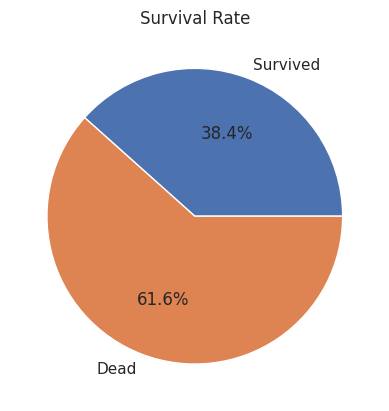

In [383]:
survived = df_train[df_train['Survived'] == 1]
dead = df_train[df_train['Survived'] == 0]

plt.title("Survival Rate")
plt.pie([len(survived), len(dead)], labels=["Survived", "Dead"], autopct="%0.1f%%")
plt.show()

### Sex

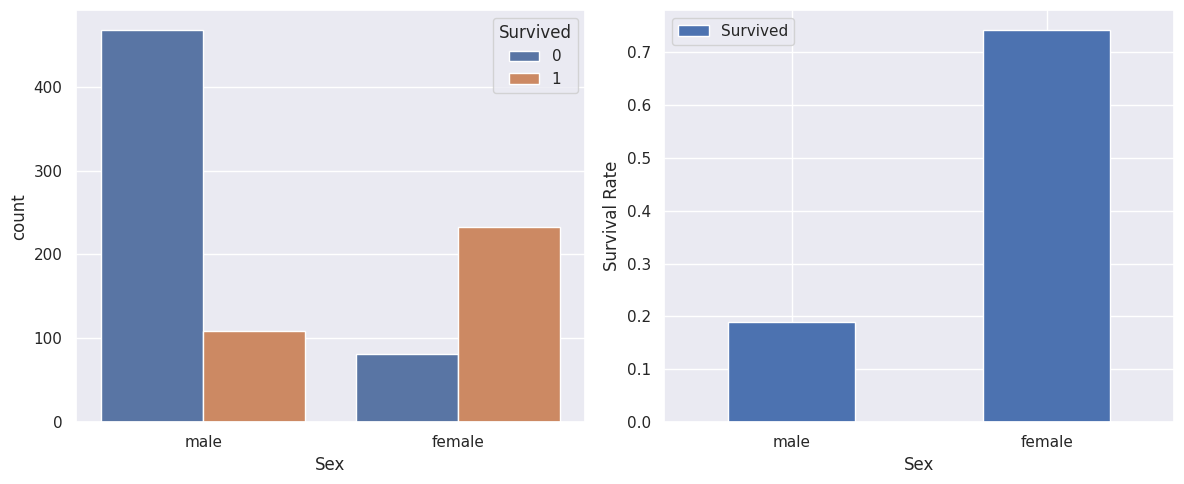

In [384]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(df_train, x="Sex", hue="Survived", ax=axs[0])
ss = df_train[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(["Sex"], ascending=False)
ss.plot(kind="bar", xlabel="Sex", ylabel="Survival Rate", rot=0, ax=axs[1])

plt.tight_layout()
plt.show()

### PClass

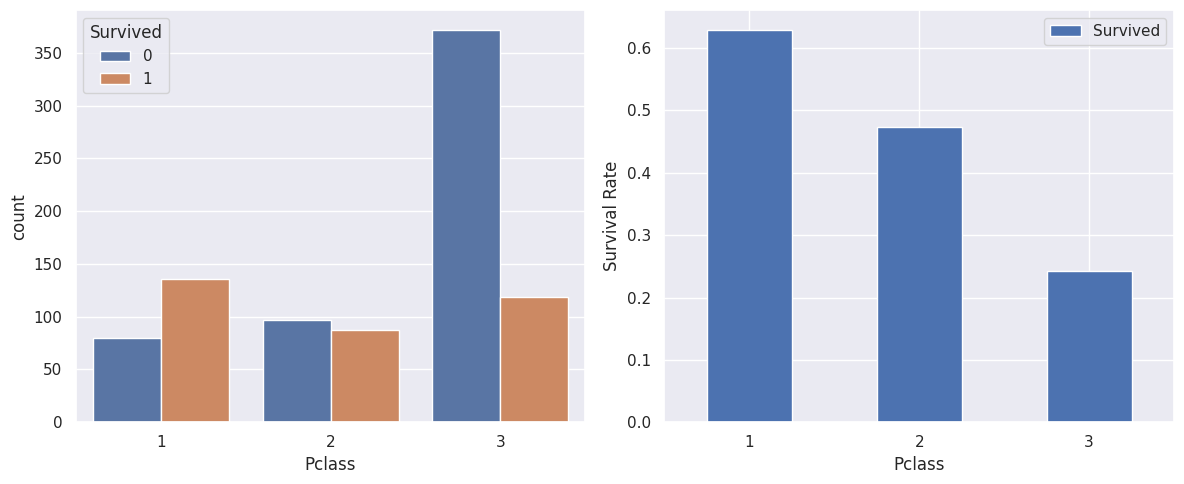

In [385]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(df_train, x="Pclass", hue="Survived", ax=axs[0])
ps = df_train[["Pclass", "Survived"]].groupby(['Pclass']).mean()
ps.plot(kind="bar", xlabel="Pclass", ylabel="Survival Rate", rot=0, ax=axs[1])

plt.tight_layout()
plt.show()

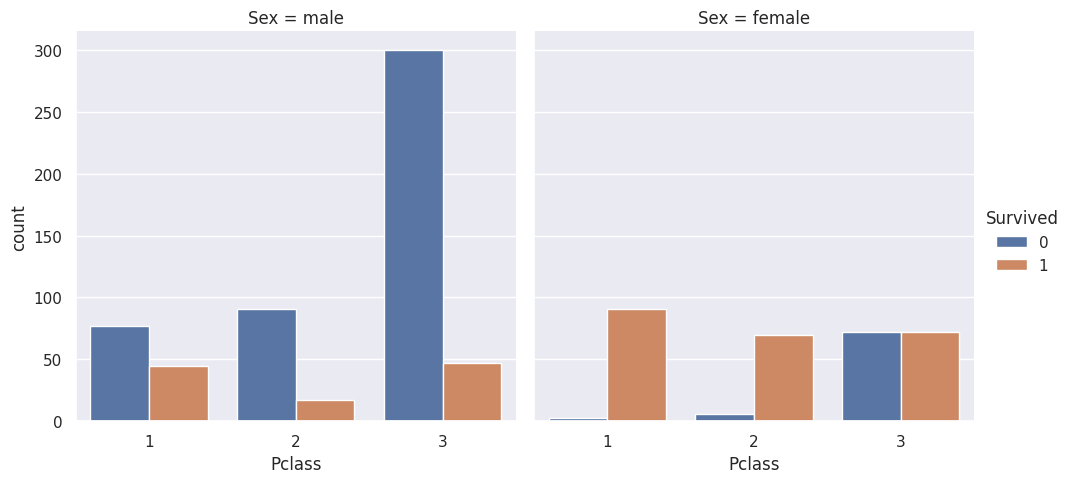

In [386]:
sns.catplot(kind='count', data=df_train, x='Pclass', col='Sex', hue='Survived')
# TODO: Plot each class survival rate group by sex

### Age

<Axes: xlabel='Age', ylabel='Count'>

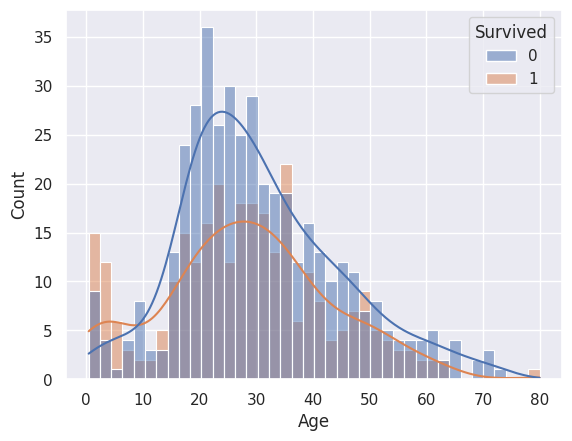

In [387]:
sns.histplot(data=df_train, x='Age', bins=40, hue='Survived', kde=True)

## Data Preprocessing

### Flare

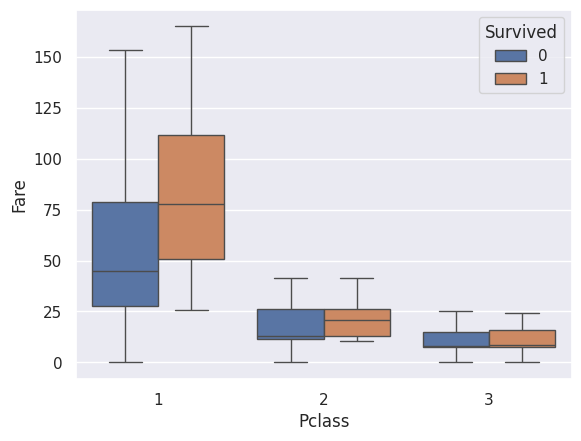

In [388]:
# plt.figure(figsize=(6, 10))
sns.boxplot(data=df_train, x='Pclass', y='Fare', hue='Survived', showfliers=False)
plt.show()

In [389]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler().fit(df_train[['Fare']])

df_train["ScaledFare"] = rs.transform(df_train[['Fare']])
df_test["ScaledFare"] = rs.transform(df_test[["Fare"]])

df_train["ScaledFare"].describe()

count    891.000000
mean       0.768745
std        2.152200
min       -0.626005
25%       -0.283409
50%        0.000000
75%        0.716591
max       21.562738
Name: ScaledFare, dtype: float64

### Courtesy Title

<Axes: >

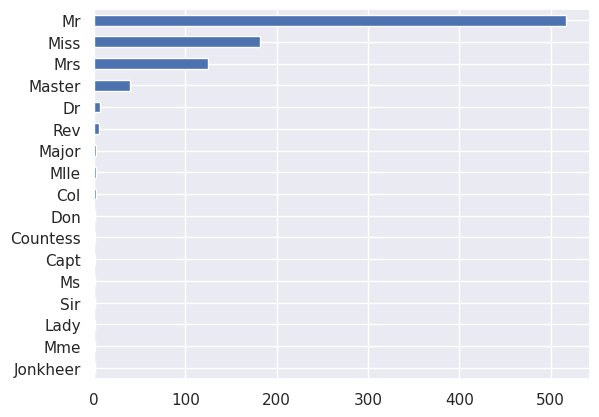

In [390]:
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.')
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.')

df_train['Title'].value_counts().sort_values().plot(kind="barh")

| Courtesy Title | Description                                                                    |
|:-------------- |:------------------------------------------------------------------------------ |
| Mr             | Man without specifying marital status or profession                            |
| Miss           | Unmarried woman or girl                                                        |
| Mrs            | Married woman                                                                  |
| Master         | Boy                                                                            |
| Rev            | Reverend, member of the clergy                                                 |
| Dr             | Doctor, a person who has obtained a doctoral degree or who is a medical doctor |
| Col            | Colonel, a military rank                                                       |
| Mlle           | Mademoiselle, an unmarried woman or girl in French                             |
| Major          | A military rank                                                                |
| Ms             | A woman without specifying her marital status                                  |
| Lady           | A woman of noble or high social rank                                           |
| Mme            | Madame, a married woman in French                                              |
| Countess       | A woman's title of nobility ranking                                            |
| Dona           | A woman of rank, nobility, or authority in Spanish-speaking areas              |
| Jonkheer       | A Dutch honorific of nobility, similar to the English "sir."                   |
| Capt           | Captain, a military rank or professional title                                 |
| Sir            | A man of rank or authority, particularly a knight                              |
| Don            | A man of rank, nobility, or authority in Spanish-speaking areas                |

<Axes: xlabel='Title', ylabel='Survived'>

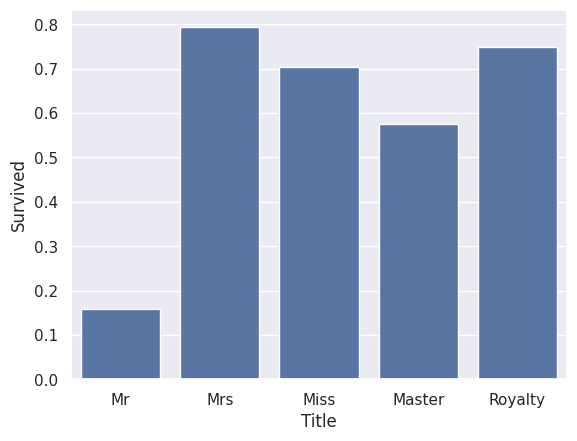

In [391]:
def set_title(x):
    title = x["Title"]
    sex = x["Sex"]
    if title in ['Sir', 'Jonkheer', 'Countess', 'Lady']:
        return 'Royalty'
    elif title in ['Capt', 'Col', 'Major', 'Don', 'Rev']:
        return 'Mr'
    elif title in ['Mlle', 'Mme', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if sex == 'male':
            return 'Mr'
        else:
            return 'Mrs'
    elif title in ['Master', 'Mr', 'Mrs', 'Miss']:
        return title
    else:
        if sex == 'male':
            return 'Mr'
        else:
            return 'Mrs'

df_train["Title"] = df_train.apply(set_title, axis=1)
df_test["Title"] = df_test.apply(set_title, axis=1)

sns.barplot(df_train, x='Title', y='Survived', ci=None)

### Ticket

<Axes: xlabel='TicketCount', ylabel='count'>

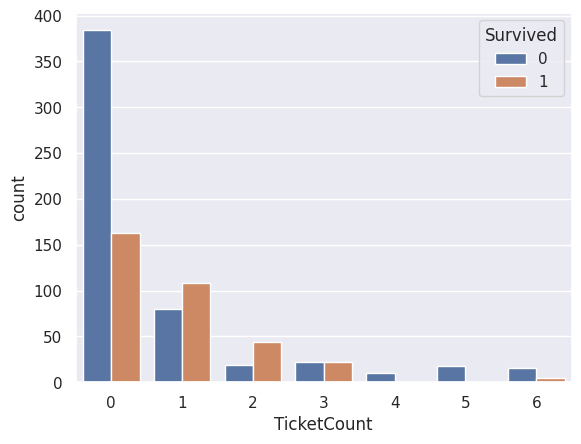

In [392]:
from collections import defaultdict

ticket_counts = defaultdict(lambda: None, df_train["Ticket"].value_counts().to_dict())
df_train['TicketCount'] = df_train["Ticket"].map(ticket_counts, na_action='ignore').fillna(1) - 1
df_test['TicketCount'] = df_test["Ticket"].map(ticket_counts, na_action='ignore').fillna(1) - 1

sns.countplot(data=df_train, x='TicketCount', hue='Survived')

In [395]:
f = lambda n: 1 <= n <= 3

df_train['SmallGroup'] = df_train["TicketCount"].apply(f)
df_test['SmallGroup'] = df_test["TicketCount"].apply(f)

### Deck

In [396]:
df_train['Deck'] = df_train["Cabin"].str[0]
df_test['Deck'] = df_test["Cabin"].str[0]

### Embarked

In [397]:
df_train['Embarked'] = df_train.groupby('Pclass')['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))
df_test['Embarked'] = df_test.groupby('Pclass')['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))

### Age

In [398]:
df_train['Age'] = df_train['Age'].fillna(df_train.groupby(["Pclass", "Sex", "Title"])['Age'].transform('mean'))

Note:  
- Some people use RandomForestRegressor to fill null values.

In [399]:
f = lambda n: n <= 8

df_train['Child'] = df_train["Age"].apply(f)
df_test['Child'] = df_test["Age"].apply(f)

### Family

<Axes: xlabel='Family', ylabel='count'>

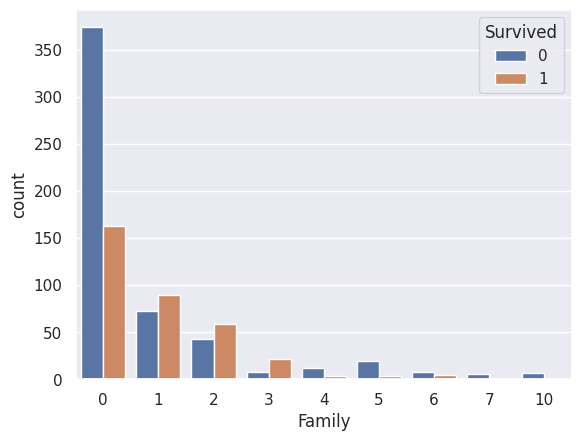

In [400]:
df_train['Family'] = df_train["SibSp"] + df_train["Parch"]
df_test['Family'] = df_test["SibSp"] + df_test["Parch"]

sns.countplot(data=df_train, x='Family', hue='Survived')

In [401]:
f = lambda n: 1 <= n <= 3

df_train['SmallFamily'] = df_train["Family"].apply(f)
df_test['SmallFamily'] = df_test["Family"].apply(f)

### Pclass

In [402]:
df_train["Pclass"] = df_train["Pclass"].apply(str)
df_test["Pclass"] = df_test["Pclass"].apply(str)

### Encoding

In [403]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  ScaledFare   891 non-null    float64
 13  Title        891 non-null    object 
 14  TicketCount  891 non-null    int64  
 15  SmallGroup   891 non-null    bool   
 16  Deck         204 non-null    object 
 17  Child        891 non-null    bool   
 18  Family       891 non-null    int64  
 19  SmallFam

In [404]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encode_cols = ['Sex']
for col in encode_cols:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    print('Encoding:', col, le.classes_)

Encoding: Sex ['female' 'male']


Note  
 - One-hot encoding(creating separate columns for each value of column) should not be used with binary valued variables.  
 - Doing so causes **DUMMY VARIABLE TRAP**.

In [492]:
train = pd.get_dummies(df_train.drop(["PassengerId", "Name", "Fare", "Ticket", "Cabin"], axis=1))
test = pd.get_dummies(df_test.drop(["PassengerId", "Name", "Fare", "Ticket", "Cabin"], axis=1))

In [493]:
drop_cols = []
for col, corr in zip(train.corr().Survived.index, train.corr().Survived):
    if abs(corr) < 0.2:
        drop_cols.append(col)
print('Dropping cols:', drop_cols)
train = train.drop(drop_cols, axis=1)
test = test.drop(list(set(drop_cols) & set(test.columns)), axis=1)

Dropping cols: ['Age', 'SibSp', 'Parch', 'TicketCount', 'Child', 'Family', 'Pclass_2', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Royalty', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T']


### Heatmap

<Axes: >

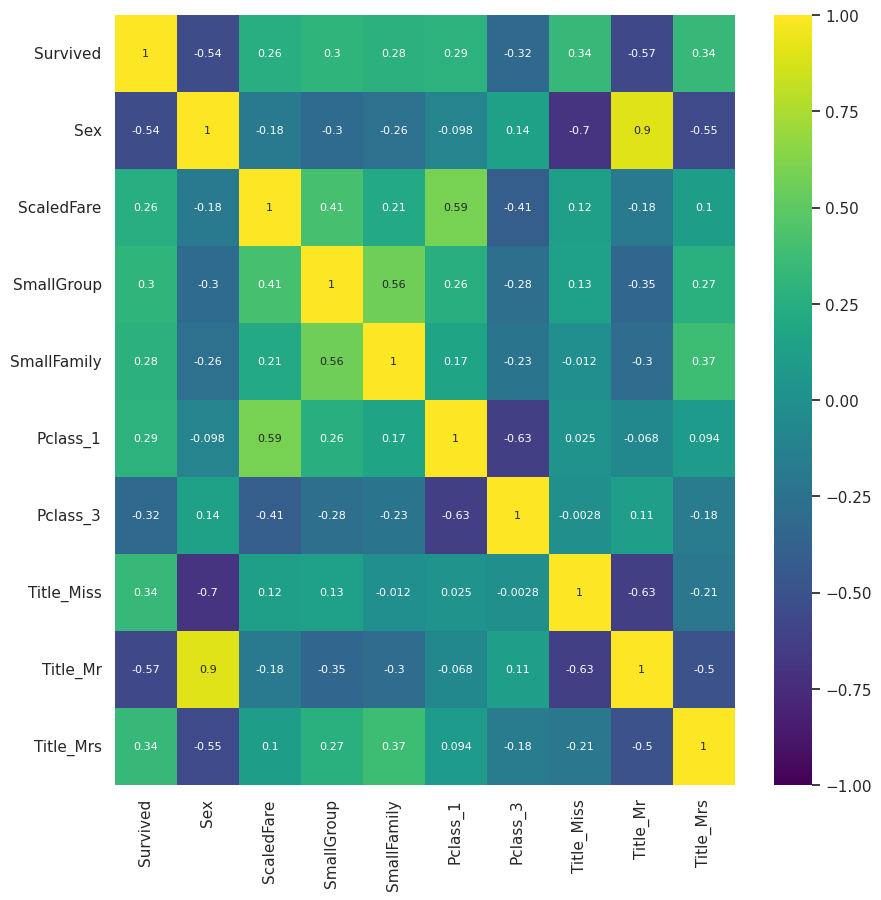

In [494]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, annot_kws={'size': 8}, vmin=-1, vmax=1, cmap='viridis')

In [495]:
train = train.drop(['Sex', 'Pclass_1'], axis=1)
test = test.drop(['Sex', 'Pclass_1'], axis=1)

<Axes: >

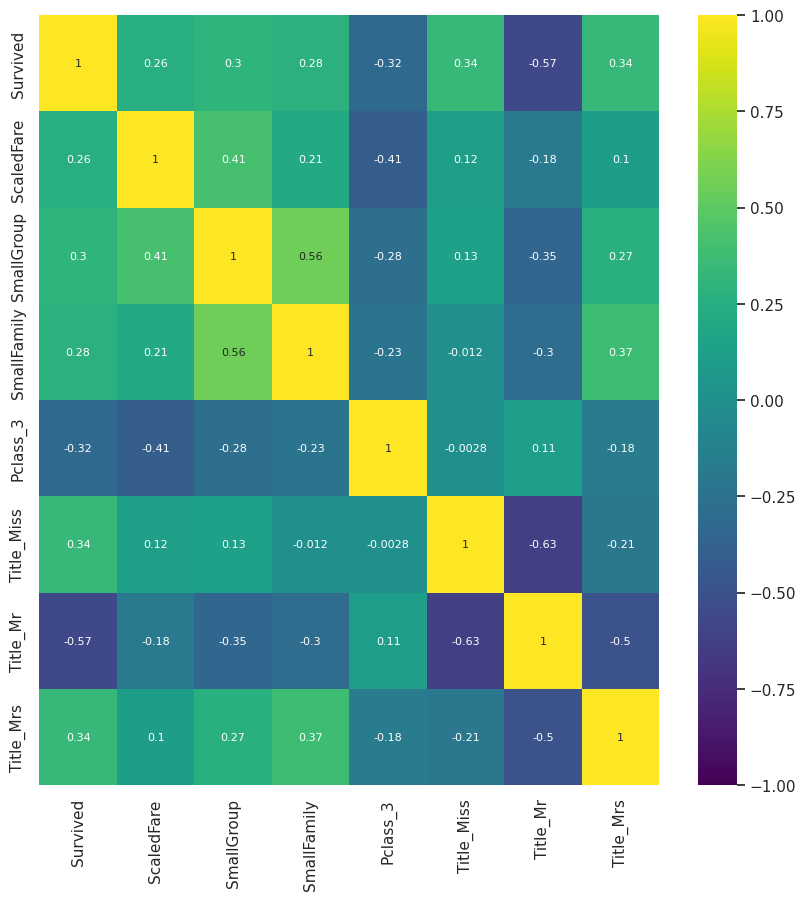

In [496]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, annot_kws={'size': 8}, vmin=-1, vmax=1, cmap='viridis')

## Training

In [497]:
from flaml import AutoML
automl = AutoML()
automl_settings = {
    "task": "classification",
    "time_budget": 60,
    "log_file_name": f"{COMPETITION}.log",
    "estimator_list": ['lgbm', 'xgboost', 'xgb_limitdepth', 'rf', 'extra_tree'],
    "metric": "ap",
}
automl.fit(dataframe=train, label='Survived', **automl_settings)

[flaml.automl.logger: 01-31 17:03:42] {1679} INFO - task = classification
[flaml.automl.logger: 01-31 17:03:42] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 01-31 17:03:42] {1788} INFO - Minimizing error metric: 1-ap
[flaml.automl.logger: 01-31 17:03:42] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'xgboost', 'xgb_limitdepth', 'rf', 'extra_tree']
[flaml.automl.logger: 01-31 17:03:42] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 01-31 17:03:42] {2344} INFO - Estimated sufficient time budget=408s. Estimated necessary time budget=3s.
[flaml.automl.logger: 01-31 17:03:42] {2391} INFO -  at 0.1s,	estimator lgbm's best error=0.2067,	best estimator lgbm's best error=0.2067
[flaml.automl.logger: 01-31 17:03:42] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 01-31 17:03:42] {2391} INFO -  at 0.1s,	estimator lgbm's best error=0.2067,	best estimator lgbm's best error=0.2067
[flaml.automl.logger: 01-31 17:03:42] {2218} INFO 

In [498]:
from pprint import pprint

print('Best ML leaner:', automl.best_estimator)
print("Best score:", automl.score(train.drop(["Survived"], axis=1), train["Survived"]))
print('Best hyperparmeter config:')
pprint(automl.best_config)

Best ML leaner: lgbm
Best score: 0.8900112233445566
Best hyperparmeter config:
{'colsample_bytree': 0.6469726212777197,
 'learning_rate': 0.11549142333280608,
 'log_max_bin': 8,
 'min_child_samples': 2,
 'n_estimators': 47,
 'num_leaves': 16,
 'reg_alpha': 0.032619809462956464,
 'reg_lambda': 0.00406523645285879}


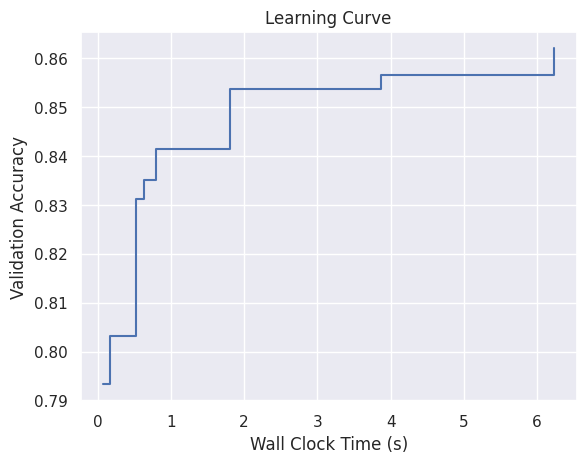

In [499]:
from flaml.automl.data import get_output_from_log

time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=automl_settings["log_file_name"], time_budget=120)

plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

## Submission

In [500]:
predicted = automl.predict(test).astype('uint8')
submission = pd.DataFrame({'PassengerId': df_test["PassengerId"], 'Survived': predicted})
submission.to_csv('./submission.csv', index=False)

In [501]:
! kaggle competitions submit -c {COMPETITION} -f submission.csv -m "Correlation >= 0.2"

100% 2.77k/2.77k [00:01<00:00, 1.71kB/s]
400 - Bad Request - Submission not allowed:  Your team has used its daily Submission allowance (10) today, please try again tomorrow UTC (6.9 hours from now).


In [502]:
! kaggle competitions submissions {COMPETITION}

fileName               date                 description                              status    publicScore  privateScore  
---------------------  -------------------  ---------------------------------------  --------  -----------  ------------  
submission.csv         2024-01-31 17:02:05  Drop test Pclass_1                       complete  0.7799                     
submission.csv         2024-01-31 16:56:39  Drop Title_Miss                          complete  0.76076                    
submission.csv         2024-01-31 16:51:38  Drop Pclass_1                            complete  0.7799                     
submission.csv         2024-01-31 16:47:36  Higher correlation                       complete  0.77033                    
submission.csv         2024-01-31 16:42:58  More features                            complete  0.76794                    
submission.csv         2024-01-31 16:39:00  Small Group                              complete  0.76794                    
submission.csv  

## Reference
- [鐵達尼號的悲劇：預測船難生還者的特徵工程筆記（搭配 FLAML 自動化建模）以及對 Kaggle 競賽的一些觀察](https://alankrantas.medium.com/%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E7%9A%84%E6%82%B2%E5%8A%87-%E9%A0%90%E6%B8%AC%E8%88%B9%E9%9B%A3%E7%94%9F%E9%82%84%E8%80%85%E7%9A%84%E7%89%B9%E5%BE%B5%E5%B7%A5%E7%A8%8B%E7%AD%86%E8%A8%98-%E6%90%AD%E9%85%8D-flaml-%E8%87%AA%E5%8B%95%E5%8C%96%E5%BB%BA%E6%A8%A1-%E4%BB%A5%E5%8F%8A%E5%B0%8D-kaggle-%E7%AB%B6%E8%B3%BD%E7%9A%84%E4%B8%80%E4%BA%9B%E8%A7%80%E5%AF%9F-ca3f4b11af34)
- [Titanic Survival: A complete guide for Beginners](https://www.kaggle.com/code/blurredmachine/titanic-survival-a-complete-guide-for-beginners/notebook)
- [Titanic - Advanced Feature Engineering Tutorial](https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial/notebook?scriptVersionId=27280410)
- [Visualization to understand how RandomForestClassifier is getting train](https://www.kaggle.com/competitions/titanic/discussion/262100)